In [161]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#creat a flower_model class that inherits nn.Module
class flower_model(nn.Module):
  #input layer (4 features of flower)-->
  #hiden layer1-->
  #hiden layer2-->
  #output

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  #def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    #super().__init__() # instantiate our nn.Module
    #self.fc1 = nn.Linear(in_features, h1)
    #self.fc2 = nn.Linear(h1, h2)
    #self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

# Pick a manual seed for randomization
torch.manual_seed(66)
# Create an instance of model
model = flower_model()

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [162]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [163]:
#Train test split! set X, Y
X = my_df.drop('variety', axis=1)
Y = my_df['variety']

#Convert these to numpy arrays
X = X.values
Y = Y.values

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=66)

In [166]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Convert Y labels to tensors long
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)


In [167]:
# Set criterion of model to measure the error, how far off the prediction are form the data
criterion = nn.CrossEntropyLoss()

# Choose Adam optimizer lr = learning rate
#(if error doesn't go down after a bunch of iterations(epochs), lower down lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [168]:
# Train model
# Epochs? (One run through all the training data in our netword)
epochs = 100
losses = []
for i in range(epochs):
  #go forwards and get a prediciton
  Y_pred = model.forward(X_train)

  # Measure the loss/error, gonna be high at first
  loss = criterion(Y_pred, Y_train)

  # keep track of losses
  losses.append(loss.detach().numpy())

# Print every 10 epochs
  if i%10 == 0:
    print(f'Epochs: {i} and loss: {loss}')

# Do some back propagation: take the error rate of forward propagation
# and feed it back through the netwok to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epochs: 0 and loss: 1.1745127439498901
Epochs: 10 and loss: 0.9889029264450073
Epochs: 20 and loss: 0.7695277333259583
Epochs: 30 and loss: 0.5186120271682739
Epochs: 40 and loss: 0.3732514977455139
Epochs: 50 and loss: 0.23854896426200867
Epochs: 60 and loss: 0.13713183999061584
Epochs: 70 and loss: 0.08922816067934036
Epochs: 80 and loss: 0.07053378969430923
Epochs: 90 and loss: 0.06240519508719444


Text(0.5, 0, 'epochs')

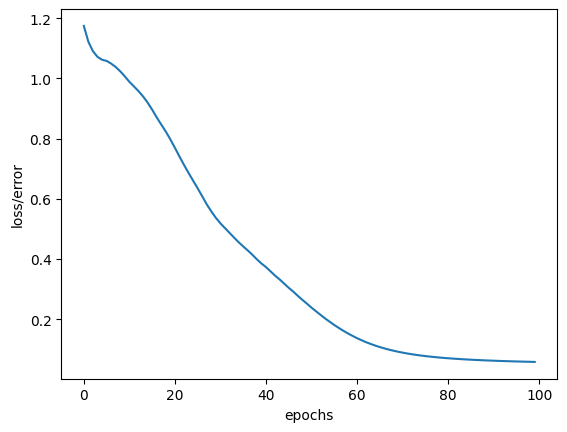

In [170]:
# Graph it out
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('epochs')

In [172]:
# Evalute the flower_model on test set
with torch.no_grad():
  #turn off back propagation
  Y_eval = model.forward(X_test)
  loss = criterion(Y_eval, Y_test)

loss


tensor(0.0971)